In [25]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
""" 
Visualize results from embeddings of models with speed features included
"""
path = r'' # use your path
all_files = glob.glob(os.path.join("./results" , "full_evaluation_speed/*.csv"))

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)


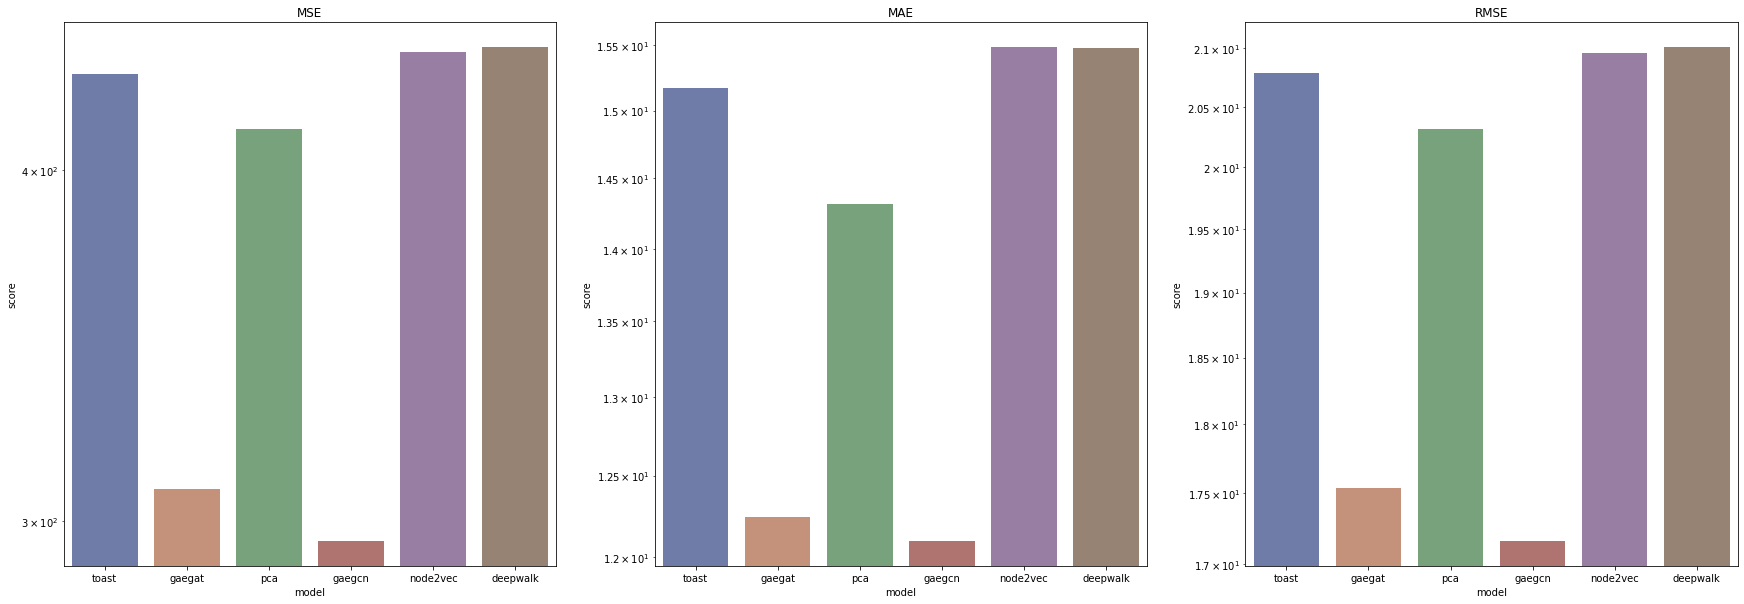

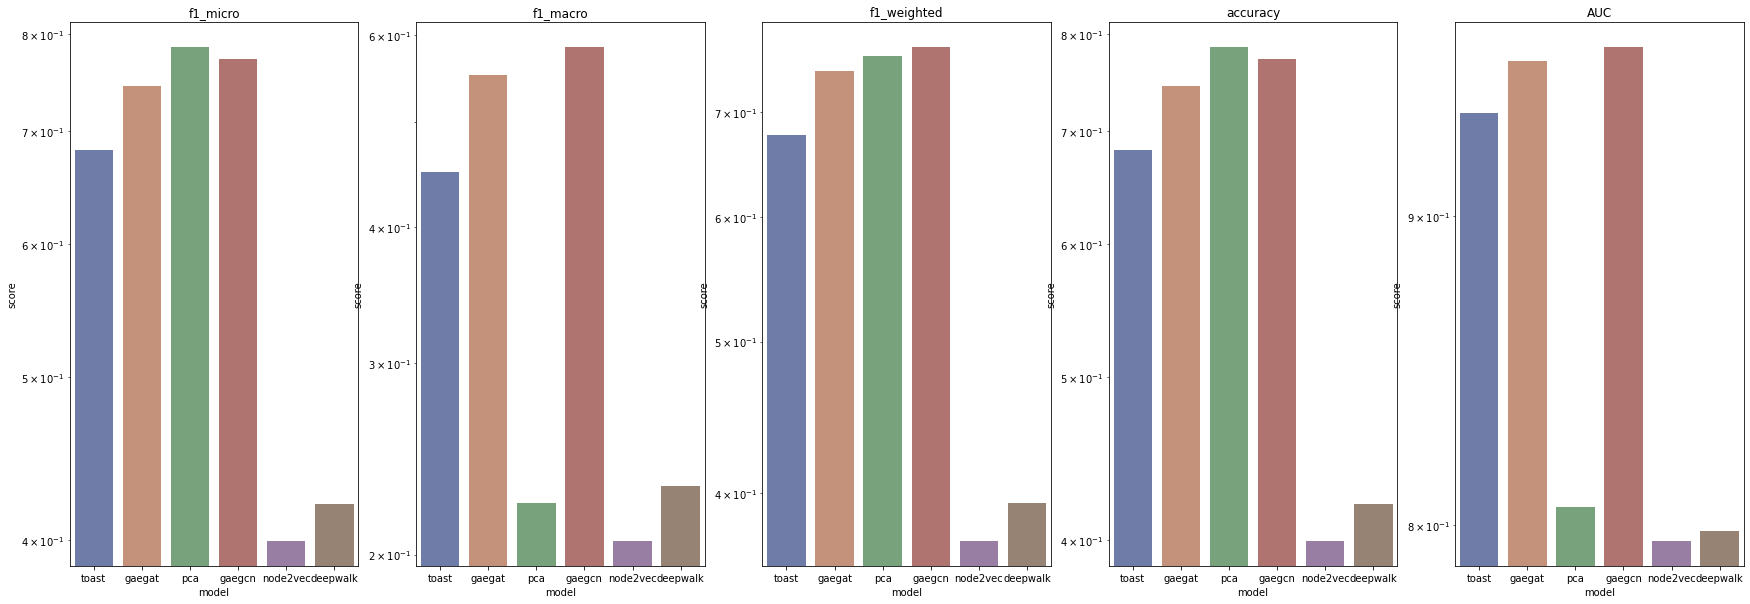

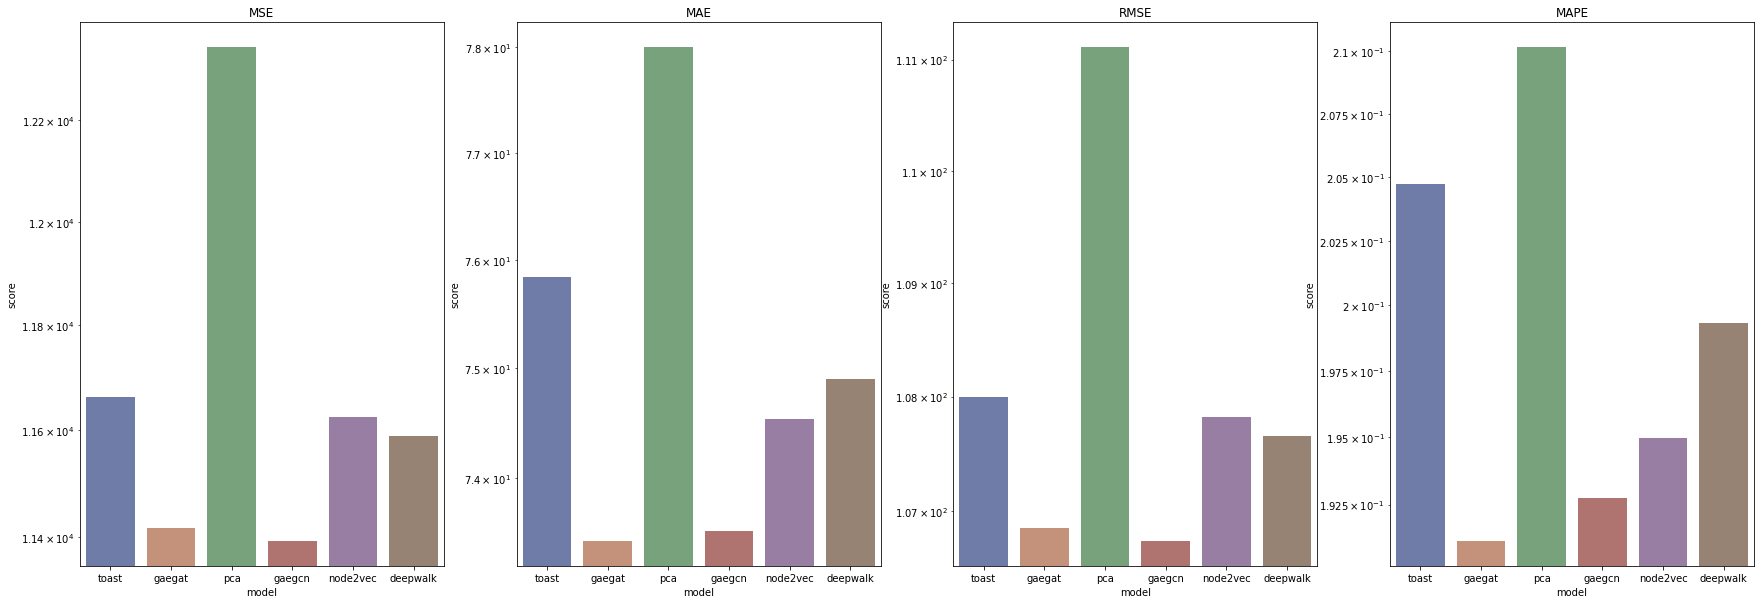

In [40]:
for df in dfs:
    # convert to barplot friendly format
    df = df.set_index("model").stack().reset_index().rename(columns={"level_1": "score_func", 0: "score"})
    score_funcs = df["score_func"].unique()
    fig, ax = plt.subplots(1, len(score_funcs), figsize=(30,10))
    for i, sf in enumerate(score_funcs):
        g = sns.barplot(
            data=df[df["score_func"]==sf],
            x="model", y="score",
            ci="sd", palette="dark", alpha=.6, ax=ax[i]
        )
        g.set_yscale("log")
        g.set_title(sf)
        #g.despine(left=True)
        #g.set_axis_labels("score function", "score")